--- Statistics for 'Likes' (from 113 non-missing values) ---
Mean: 3136.24
Median: 441.00
Standard Deviation: 9927.87


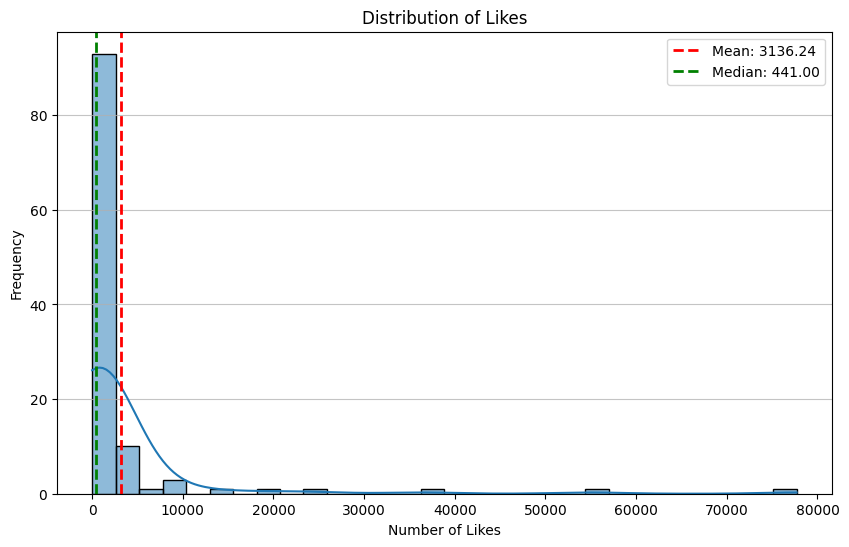

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instructions for Google Colab:
# 1. Upload your 'Final_IDS506.csv' file to your Colab session.
# You can do this by clicking on the "Files" icon on the left sidebar,
# then clicking the "Upload to session storage" button (folder with an upward arrow)
# and selecting your CSV file.
# 2. Ensure the file name in the pd.read_csv() function below matches
# the uploaded file name exactly.

# Define the file name
file_name = "Final Dataset.csv" # Make sure this matches your uploaded file name

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # --- Analysis of the "Likes" column ---

    # Check if the 'Likes' column exists
    if 'Likes' in df.columns:
        # Extract the 'Likes' column and remove missing values for accurate statistics and plotting
        likes_data = df['Likes'].dropna()

        if likes_data.empty:
            print(f"The 'Likes' column in '{file_name}' is empty or contains only missing values.")
        else:
            # Calculate mean, median, and standard deviation
            mean_likes = likes_data.mean()
            median_likes = likes_data.median()
            std_dev_likes = likes_data.std()

            # Print the calculated statistics
            print(f"--- Statistics for 'Likes' (from {len(likes_data)} non-missing values) ---")
            print(f"Mean: {mean_likes:.2f}")
            print(f"Median: {median_likes:.2f}")
            print(f"Standard Deviation: {std_dev_likes:.2f}")

            # Plot the distribution of 'Likes'
            plt.figure(figsize=(10, 6))
            sns.histplot(likes_data, kde=True, bins=30) # kde=True adds a Kernel Density Estimate curve
            plt.title('Distribution of Likes')
            plt.xlabel('Number of Likes')
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.75) # Add a grid for better readability

            # Add vertical lines for mean and median
            plt.axvline(mean_likes, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_likes:.2f}')
            plt.axvline(median_likes, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_likes:.2f}')
            plt.legend()

            plt.show()
    else:
        print(f"Error: Column 'Likes' not found in the dataset '{file_name}'.")
        print(f"Available columns are: {df.columns.tolist()}")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure you have uploaded the file to your Colab session and the file name is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Statistics for 'Comments' (from 116 non‑missing values) ---
Mean:               241.85
Median:             72.00
Standard Deviation: 596.59


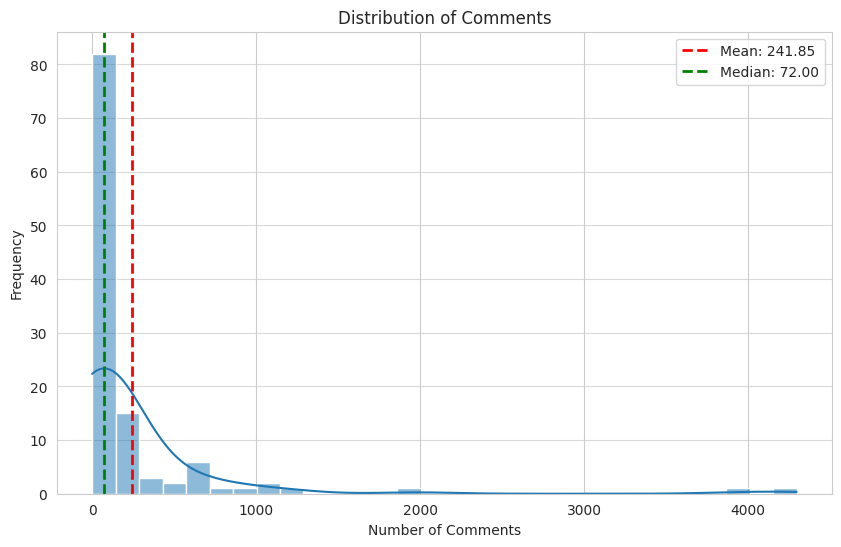

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- File name (adjust if needed) ---
file_name = "Final Dataset.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # --- Analysis of the "Comments" column ---
    if 'Comments' in df.columns:
        comments_data = df['Comments'].dropna()

        if comments_data.empty:
            print(f"The 'Comments' column in '{file_name}' is empty or contains only missing values.")
        else:
            # Descriptive stats
            mean_comments   = comments_data.mean()
            median_comments = comments_data.median()
            std_comments    = comments_data.std()

            print(f"--- Statistics for 'Comments' (from {len(comments_data)} non‑missing values) ---")
            print(f"Mean:               {mean_comments:.2f}")
            print(f"Median:             {median_comments:.2f}")
            print(f"Standard Deviation: {std_comments:.2f}")

            # Distribution plot
            plt.figure(figsize=(10, 6))
            sns.histplot(comments_data, kde=True, bins=30)
            plt.title('Distribution of Comments')
            plt.xlabel('Number of Comments')
            plt.ylabel('Frequency')
            plt.grid(axis='y', alpha=0.75)

            # Mean & median lines
            plt.axvline(mean_comments,   color='red',   linestyle='dashed', linewidth=2,
                        label=f'Mean: {mean_comments:.2f}')
            plt.axvline(median_comments, color='green', linestyle='dashed', linewidth=2,
                        label=f'Median: {median_comments:.2f}')
            plt.legend()

            plt.show()
    else:
        print(f"Error: Column 'Comments' not found in the dataset '{file_name}'.")
        print(f"Available columns are: {df.columns.tolist()}")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. "
          "Please upload it to your Colab session or check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- User Input: Please verify these column names match your CSV ---
# List of predictor columns you've chosen
predictor_column_names = [
    "Female",
    "Male", # If 'male' is the column name, use that.
    'name of a medication?__yes',
    'recorded indoors?__yes',
    'improvement after stopping the medication__yes',
    'encourage viewers to seek professional help or consult a healthcare provider__yes',
    'try multiple medications __yes',
    'How severe were the side effects mentioned by the user while using the medication?_flag',
    '''Based on the user's description, how severe were the withdrawal symptoms they experienced?_flag'''
]
target_column_name = "Likes"
file_path = "Final Dataset.csv" # Ensure this file is in your Colab working directory

# --- Load Data ---
try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please upload the file to your Colab session and ensure the path is correct.")
    exit() # Exit if file not found

# --- Data Preparation ---
# Keep only the relevant columns for this analysis
columns_to_analyze = [target_column_name] + predictor_column_names

# Verify that all specified columns exist in the DataFrame
missing_cols = [col for col in columns_to_analyze if col not in df.columns]
if missing_cols:
    print(f"\nError: The following specified columns were not found in the CSV: {missing_cols}")
    print("Please check the column names in your CSV and update the 'predictor_column_names' or 'target_column_name' list.")
    # For demonstration, we'll try to proceed with columns that DO exist.
    # In a real scenario, you'd need to correct the names.
    predictor_column_names = [col for col in predictor_column_names if col in df.columns]
    columns_to_analyze = [target_column_name] + predictor_column_names
    if target_column_name not in df.columns:
        print(f"Target column '{target_column_name}' is missing. Cannot proceed with relationship to target tests.")
        # We might still be able to do inter-predictor tests if predictors are found.
    print(f"Proceeding with found columns: {columns_to_analyze}")


# Create a working DataFrame
# For simplicity in demonstrating tests, we'll drop rows where 'Likes' or any of the selected predictors are missing.
# You might choose a different strategy (e.g., imputation) for a full analysis.
df_analysis = df[columns_to_analyze].copy()
df_analysis.dropna(subset=[target_column_name], inplace=True) # Crucial for target-related tests
# For inter-predictor tests, NaNs in predictors are handled by some tests or need pair-wise consideration.

print(f"\nShape of data before dropping NaNs in predictors for analysis: {df_analysis.shape}")
# For specific tests, it's often better to handle NaNs on a per-test basis or ensure clean data.

print("\n--- Part 1: Relationship of each predictor with 'Likes' ---")
if target_column_name in df.columns:
    for predictor in predictor_column_names:
        if predictor not in df_analysis.columns:
            print(f"Skipping {predictor} vs Likes (column not found after initial check).")
            continue

        print(f"\n--- Analyzing: '{predictor}' vs '{target_column_name}' ---")

        # Ensure data for current predictor and target is clean for this test
        temp_df_for_test = df_analysis[[predictor, target_column_name]].dropna()

        if temp_df_for_test.empty or temp_df_for_test[predictor].nunique() < 2 :
            print(f"Not enough data or unique groups in '{predictor}' after dropping NaNs to perform test.")
            continue

        # Assuming predictors are binary or can be treated as having distinct groups.
        # If a predictor is ordinal with 3+ categories (e.g. severity flags), Kruskal-Wallis is better.
        # For binary, Mann-Whitney U is common.

        # Get unique categories/values for the predictor
        groups = temp_df_for_test[predictor].unique()

        if len(groups) == 2:
            group1_likes = temp_df_for_test[temp_df_for_test[predictor] == groups[0]][target_column_name]
            group2_likes = temp_df_for_test[temp_df_for_test[predictor] == groups[1]][target_column_name]
            if len(group1_likes) > 0 and len(group2_likes) > 0:
                try:
                    u_statistic, p_value_mw = stats.mannwhitneyu(group1_likes, group2_likes, alternative='two-sided')
                    print(f"Mann-Whitney U Test for '{predictor}':")
                    print(f"  U-statistic: {u_statistic:.2f}, P-value: {p_value_mw:.4f}")
                    if p_value_mw < 0.05:
                        print(f"  Interpretation: Significant difference in '{target_column_name}' distribution between categories of '{predictor}'.")
                    else:
                        print(f"  Interpretation: No significant difference in '{target_column_name}' distribution between categories of '{predictor}'.")
                except ValueError as e:
                    print(f"  Could not perform Mann-Whitney U test for {predictor} (e.g., all values same in a group): {e}")
            else:
                print(f"  Not enough data in one or both groups of '{predictor}' to perform Mann-Whitney U test.")

        elif len(groups) > 2: # Could be an ordinal flag like severity
            print(f"'{predictor}' has {len(groups)} unique values. Consider Kruskal-Wallis if ordinal.")
            # Example for Kruskal-Wallis (if applicable)
            group_data = [temp_df_for_test[temp_df_for_test[predictor] == g][target_column_name] for g in groups if len(temp_df_for_test[temp_df_for_test[predictor] == g][target_column_name]) > 0]
            if len(group_data) >= 2: # Kruskal-Wallis needs at least 2 groups
                try:
                    h_statistic, p_value_kw = stats.kruskal(*group_data)
                    print(f"Kruskal-Wallis Test for '{predictor}':")
                    print(f"  H-statistic: {h_statistic:.2f}, P-value: {p_value_kw:.4f}")
                    if p_value_kw < 0.05:
                        print(f"  Interpretation: Significant difference in '{target_column_name}' distribution across categories of '{predictor}'.")
                    else:
                        print(f"  Interpretation: No significant difference in '{target_column_name}' distribution across categories of '{predictor}'.")
                except ValueError as e:
                     print(f"  Could not perform Kruskal-Wallis test for {predictor}: {e}")
            else:
                print(f" Not enough groups with data for '{predictor}' to perform Kruskal-Wallis test.")
        else:
            print(f"  '{predictor}' does not have enough distinct groups for comparison.")






print("\n\n--- Part 2: Multicollinearity Among Predictors ---")
if len(predictor_column_names) < 2:
    print("Need at least two predictors to check for multicollinearity.")
else:
    # Create a DataFrame for storing results (e.g., p-values of Chi-squared tests)
    num_predictors = len(predictor_column_names)
    # For Phi coefficient, we'll print it directly.
    # For a matrix, you might store p-values or Phi values.
    print("Chi-squared tests for association between pairs of predictors:")

    for i in range(num_predictors):
        for j in range(i + 1, num_predictors):
            predictor1_name = predictor_column_names[i]
            predictor2_name = predictor_column_names[j]

            if predictor1_name not in df_analysis.columns or predictor2_name not in df_analysis.columns:
                print(f"Skipping pair: {predictor1_name} vs {predictor2_name} (one or both columns not found).")
                continue

            # Create contingency table, dropping NaNs for the pair
            contingency_df = df_analysis[[predictor1_name, predictor2_name]].copy().dropna()
            if contingency_df.empty or contingency_df[predictor1_name].nunique() < 1 or contingency_df[predictor2_name].nunique() < 1 :
                print(f"\nNot enough data for '{predictor1_name}' vs '{predictor2_name}' after dropping NaNs for the pair.")
                continue

            contingency_table = pd.crosstab(contingency_df[predictor1_name], contingency_df[predictor2_name])

            print(f"\n--- '{predictor1_name}' vs '{predictor2_name}' ---")
            if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
                 print("  Contingency table has less than 2 rows or 2 columns. Cannot perform Chi-squared test.")
                 continue
            try:
                chi2, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)
                print(f"  Chi-squared Test: statistic={chi2:.2f}, p-value={p_value_chi2:.4f}")
                if p_value_chi2 < 0.05:
                    print(f"  Interpretation: Significant association between '{predictor1_name}' and '{predictor2_name}'.")
                else:
                    print(f"  Interpretation: No significant association between '{predictor1_name}' and '{predictor2_name}'.")

                # Calculate Phi coefficient for 2x2 tables (or if one dimension is 2)
                # More general Cramer's V is ideal but harder without statsmodels.stats.contingency_tables
                # For simplicity, if it's a 2x2 table:
                if contingency_table.shape == (2,2):
                    phi_coefficient = np.sqrt(chi2 / contingency_df.shape[0])
                    print(f"  Phi Coefficient (for 2x2): {phi_coefficient:.4f} (strength of association, 0 to 1)")

            except ValueError as e:
                print(f"  Could not perform Chi-squared test for '{predictor1_name}' vs '{predictor2_name}'. Error: {e}")
                print(f"  Contingency Table:\n{contingency_table}")


Successfully loaded 'Final Dataset.csv'

Error: The following specified columns were not found in the CSV: ['name of a medication?__yes', 'recorded indoors?__yes', 'improvement after stopping the medication__yes', 'encourage viewers to seek professional help or consult a healthcare provider__yes', 'How severe were the side effects mentioned by the user while using the medication?_flag']
Please check the column names in your CSV and update the 'predictor_column_names' or 'target_column_name' list.
Proceeding with found columns: ['Likes', 'Female', 'Male', 'try multiple medications __yes', "Based on the user's description, how severe were the withdrawal symptoms they experienced?_flag"]

Shape of data before dropping NaNs in predictors for analysis: (113, 5)

--- Part 1: Relationship of each predictor with 'Likes' ---

--- Analyzing: 'Female' vs 'Likes' ---
Mann-Whitney U Test for 'Female':
  U-statistic: 1652.00, P-value: 0.6285
  Interpretation: No significant difference in 'Likes' dis

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial # For robust NB model
import numpy as np

# --- Prerequisites ---
# Ensure your DataFrame 'df' is already loaded.
# For example, in a previous cell you would have:
# df = pd.read_csv("Your_Dataset_File.csv") # Replace Your_Dataset_File.csv with your actual file name

# --- User Input: New list of predictor column names ---
target_column = "Likes"
predictor_columns = [
    "recorded indoors__Home",
    "recorded indoors__Doctor's office", # Note: Removed potential leading space
    "name of a medication?__yes",         # Note: Removed potential leading space
    "swearing or profanity __yes",
    "Male",
    "Teenage",
    "person in the video__Content creator/influencer",
    "person in the video__ healthcare professional", # Note: Removed potential leading space
    "suicidal thoughts in the video __yes",
    "try multiple medications __yes",
    "Did the user report physical side effects (e.g., nausea, fatigue, dizziness)?_flag",
    "Did the user report psychological side effects (e.g., anxiety, numbness, agitation)?_flag",
    "After stopping antidepressants, did the user experience withdrawal symptoms?_flag",
    "nausea.1",
    "dizziness.1",
    "headaches"
]

# --- Verify DataFrame and Columns ---
if 'df' not in locals():
    print("Error: DataFrame 'df' not found. Please load your data into 'df' first.")
    # exit() # Or raise an error if running as a standalone script
else:
    print("DataFrame 'df' found.")

    if target_column not in df.columns:
        print(f"Error: Target column '{target_column}' not found in DataFrame 'df'. Cannot proceed.")
        # exit()
    else:
        # Check for predictor columns and identify missing ones
        found_predictors = []
        missing_predictors = []
        for col in predictor_columns:
            # Clean potential leading/trailing spaces from column names for matching
            clean_col = col.strip()
            if clean_col in df.columns:
                found_predictors.append(clean_col)
            else:
                missing_predictors.append(col) # Report original name if not found

        if missing_predictors:
            print(f"\nWarning: The following predictor columns were NOT found in the DataFrame and will be excluded: {missing_predictors}")

        if not found_predictors:
            print("Error: None of the specified predictor columns were found in the DataFrame. Cannot build model.")
            # exit()
        else:
            print(f"\nFound and will use the following predictors: {found_predictors}")
            predictor_columns = found_predictors # Use only found and cleaned predictors

            # --- Data Preparation for Modeling ---
            cols_for_model = [target_column] + predictor_columns
            df_model = df[cols_for_model].copy()

            # 1. Handle Missing Values (Listwise deletion for simplicity)
            original_rows = len(df_model)
            df_model.dropna(inplace=True)
            print(f"\nDropped {original_rows - len(df_model)} rows due to missing values from the selected columns. Remaining rows: {len(df_model)}")

            if len(df_model) < len(predictor_columns) + 2: # Need enough data points
                 print(f"Error: Not enough data (rows: {len(df_model)}) to fit the model with {len(predictor_columns)} predictors after dropping NaNs. Consider imputation or using fewer predictors.")
                 # exit()
            elif len(df_model) == 0:
                 print("Error: No data remains after dropping NaNs. Cannot build model.")
                 # exit()

            if len(df_model) > 0: # Proceed only if data remains
                y = df_model[target_column]
                X = df_model[predictor_columns].copy()

                # 2. Encode Categorical Variables (if any are 'object' or 'category' type)
                # Most of your listed predictors seem like they should be numeric flags (0/1 or -1/1).
                # If any are text (e.g., 'yes'/'no') or multi-level categoricals not yet dummified,
                # this step would handle them.
                categorical_cols_to_encode = []
                for col in X.columns:
                    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
                        # Also check if it's not just a binary column already represented by numbers but read as object
                        if X[col].nunique() > 2 or not pd.api.types.is_numeric_dtype(X[col].dropna().iloc[0] if not X[col].dropna().empty else None):
                             categorical_cols_to_encode.append(col)

                if categorical_cols_to_encode:
                    print(f"\nEncoding the following categorical columns using dummy variables: {categorical_cols_to_encode}")
                    X = pd.get_dummies(X, columns=categorical_cols_to_encode, drop_first=True, dtype=int)
                    print("\nData types of X after potential get_dummies (sample):")
                    print(X.dtypes.head())
                else:
                    print("\nNo explicit dummy encoding performed (assuming predictors are already numeric flags or correctly typed).")

                # Ensure all X columns are numeric
                # Also, convert boolean columns to int (0/1) if any exist
                for col in X.columns:
                    if X[col].dtype == 'bool':
                        X[col] = X[col].astype(int)

                non_numeric_cols = X.select_dtypes(exclude=np.number).columns
                if len(non_numeric_cols) > 0:
                    print(f"\nError: Some predictor columns are STILL non-numeric: {non_numeric_cols.tolist()}")
                    print("Problematic columns dtypes:")
                    for col_name in non_numeric_cols:
                        print(f"  {col_name}: {X[col_name].dtype}")
                    # exit()
                else:
                    print("\nAll predictor columns are verified or converted to numeric.")
                    X = sm.add_constant(X) # Add intercept

                    # --- Model Building: Negative Binomial Regression ---
                    print("\n--- Building Negative Binomial Regression Model ---")
                    try:
                        # Ensure y is numeric and doesn't have issues
                        if not pd.api.types.is_numeric_dtype(y):
                            print(f"Error: Target variable y ('{target_column}') is not numeric. Current dtype: {y.dtype}")
                            # exit()
                        if y.isnull().any(): # Should have been handled by dropna on df_model
                            print(f"Error: Target variable y ('{target_column}') contains NaNs. This should not happen at this stage.")
                            # exit()
                        if X.isnull().values.any(): # Check for any NaNs in X before fitting
                            print(f"Error: Predictor matrix X contains NaNs. This should not happen at this stage.")
                            print(X.isnull().sum())
                            # exit()


                        nb_model = NegativeBinomial(y, X, loglike_method='nb2')
                        nb_results = nb_model.fit(maxiter=200, disp=True) # Increased maxiter, disp=True shows optimization output

                        print("\n--- Model Summary ---")
                        print(nb_results.summary())

                        if 'alpha' in nb_results.params.index:
                             print(f"\nEstimated alpha (dispersion parameter): {nb_results.params['alpha']:.4f}")
                        elif 'lnalpha' in nb_results.params.index:
                             print(f"\nEstimated ln(alpha): {nb_results.params['lnalpha']:.4f}, so alpha: {np.exp(nb_results.params['lnalpha']):.4f}")
                        else:
                             print("\nCheck model summary for the dispersion parameter (alpha or lnalpha).")

                        print("\n--- Interpretation Notes ---")
                        print("- Coef.: The estimated coefficient (on the log scale).")
                        print("- P>|z|: The p-value. If < 0.05, the predictor is statistically significant.")
                        print("- exp(Coef.) is the Incidence Rate Ratio (IRR) for a one-unit change in the predictor.")
                        print("- alpha: A significant alpha confirms overdispersion.")

                    except Exception as e:
                        print(f"\nAn error occurred while fitting the Negative Binomial model: {e}")
                        print("Details that might help diagnose:")
                        print("Shape of X:", X.shape)
                        print("Shape of y:", y.shape)
                        print("X dtypes:\n", X.dtypes)
                        print("y dtype:", y.dtype)
                        print("Is y numeric?", pd.api.types.is_numeric_dtype(y))
                        print("NaNs in y:", y.isnull().sum())
                        print("NaNs in X (total):", X.isnull().sum().sum())
                        if X.isnull().sum().sum() > 0:
                            print("NaNs per column in X:\n", X.isnull().sum()[X.isnull().sum() > 0])


            else: # if len(df_model) == 0 after dropping NaNs
                print("Skipping model building as no data remains after handling missing values.")

DataFrame 'df' found.


Found and will use the following predictors: ['recorded indoors__Home', 'swearing or profanity __yes', 'Male', 'Teenage', 'person in the video__Content creator/influencer', 'suicidal thoughts in the video __yes', 'try multiple medications __yes', 'Did the user report physical side effects (e.g., nausea, fatigue, dizziness)?_flag', 'Did the user report psychological side effects (e.g., anxiety, numbness, agitation)?_flag', 'After stopping antidepressants, did the user experience withdrawal symptoms?_flag', 'nausea.1', 'dizziness.1', 'headaches']

Dropped 22 rows due to missing values from the selected columns. Remaining rows: 95

No explicit dummy encoding performed (assuming predictors are already numeric flags or correctly typed).

All predictor columns are verified or converted to numeric.

--- Building Negative Binomial Regression Model ---
Optimization terminated successfully.
         Current function value: 8.173611
         Iterations: 55
         Functio

In [ ]:
import pandas as pd
import numpy as np

# --- Prerequisite ---
# Ensure 'nb_results' (your fitted model object) is available.

if 'df' not in locals() or df is None: # Check if df is loaded, as it's context for predictor names
    print("Error: DataFrame 'df' not found. Please load your data into 'df' first to ensure context.")
    # This check is more about ensuring the overall environment is set up as expected.
    # If nb_results exists, this script will primarily use that.

elif 'nb_results' not in locals() and 'nb_results' not in globals():
    print("Error: 'nb_results' object not found. Please run your model fitting code first.")
else:
    alpha_threshold = 0.05

    print(f"--- Significant Factors from Model Results (p < {alpha_threshold}) ---")

    coefficients = nb_results.params
    p_values = nb_results.pvalues
    conf_intervals = nb_results.conf_int() # Returns a DataFrame with columns 0 and 1

    # Prepare data for the DataFrame
    data_for_df = []

    # --- Significance of Intercept and Dispersion Parameter (Printed Separately) ---
    if 'const' in coefficients.index:
        if p_values['const'] < alpha_threshold:
            print(f"\nIntercept ('const') is statistically significant (p-value: {p_values['const']:.4g}, coef: {coefficients['const']:.4f})")
        else:
            print(f"\nIntercept ('const') is NOT statistically significant (p-value: {p_values['const']:.4g}, coef: {coefficients['const']:.4f})")

    dispersion_param_name = None
    if 'alpha' in coefficients.index:
        dispersion_param_name = 'alpha'
    elif 'lnalpha' in coefficients.index:
        dispersion_param_name = 'lnalpha'

    if dispersion_param_name:
        alpha_coef = coefficients[dispersion_param_name]
        alpha_p_value = p_values[dispersion_param_name]
        if alpha_p_value < alpha_threshold:
            actual_alpha_value = np.exp(alpha_coef) if dispersion_param_name == 'lnalpha' else alpha_coef
            print(f"Dispersion parameter ('{dispersion_param_name}') is statistically significant (p-value: {alpha_p_value:.4g}, coef: {alpha_coef:.4f}).")
            print(f"  Estimated alpha value: {actual_alpha_value:.4f} (confirms overdispersion).")
        else:
            print(f"Dispersion parameter ('{dispersion_param_name}') is NOT statistically significant (p-value: {alpha_p_value:.4g}, coef: {alpha_coef:.4f}).")
    else:
        print("Note: Dispersion parameter ('alpha' or 'lnalpha') not found directly in params. Check model summary for its estimation if available.")

    # --- Collect Data for Significant Predictor Factors ---
    for factor_name in coefficients.index:
        # Skip intercept and dispersion parameters for the main table of factors
        if factor_name.lower() in ['const', 'alpha', 'lnalpha']:
            continue

        p_value = p_values[factor_name]
        if p_value < alpha_threshold:
            coef_val = coefficients[factor_name]
            irr = np.exp(coef_val)
            ci_lower = conf_intervals.loc[factor_name, 0] # Lower bound from conf_int()
            ci_upper = conf_intervals.loc[factor_name, 1] # Upper bound from conf_int()

            data_for_df.append({
                "Factor": factor_name,
                "Coefficient": coef_val,
                "P-value": p_value,
                "IRR (exp(coef))": irr,
                "95% CI Lower (Coef)": ci_lower,
                "95% CI Upper (Coef)": ci_upper
            })

    if data_for_df:
        significant_factors_df = pd.DataFrame(data_for_df)
        # Set Factor as index for better readability if desired, or keep as column
        # significant_factors_df.set_index("Factor", inplace=True)

        print("\n\n--- Statistically Significant Predictor Factors (Table View) ---")
        # To ensure all columns print well, you might need to set pandas display options
        # pd.set_option('display.max_columns', None)
        # pd.set_option('display.width', 1000)
        print(significant_factors_df.to_string(index=False)) # .to_string() often gives better console formatting

        print("\nInterpretation of IRR (Incidence Rate Ratio):")
        print("- IRR > 1: Factor is associated with an increase in the expected count of 'Likes'.")
        print("  (e.g., IRR = 1.5 means a 50% increase).")
        print("- IRR < 1: Factor is associated with a decrease in the expected count of 'Likes'.")
        print("  (e.g., IRR = 0.7 means a 30% decrease).")

    else:
        print("\nNo predictor factors were found to be statistically significant at the p < {alpha_threshold} level in this model.")

--- Significant Factors from Model Results (p < 0.05) ---

Intercept ('const') is statistically significant (p-value: 5.566e-10, coef: 4.8502)
Dispersion parameter ('alpha') is statistically significant (p-value: 5.006e-17, coef: 2.5775).
  Estimated alpha value: 2.5775 (confirms overdispersion).


--- Statistically Significant Predictor Factors (Table View) ---
                              Factor  Coefficient  P-value  IRR (exp(coef))  95% CI Lower (Coef)  95% CI Upper (Coef)
                             Teenage    -2.791606 0.000005         0.061323            -3.985413            -1.597799
suicidal thoughts in the video __yes     1.076878 0.001458         2.935501             0.413774             1.739981

Interpretation of IRR (Incidence Rate Ratio):
- IRR > 1: Factor is associated with an increase in the expected count of 'Likes'.
  (e.g., IRR = 1.5 means a 50% increase).
- IRR < 1: Factor is associated with a decrease in the expected count of 'Likes'.
  (e.g., IRR = 0.7 means a 

In [ ]:
# ──────────────────────────────────────────────────────────────
# 0.  Imports
# ──────────────────────────────────────────────────────────────
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial

# ──────────────────────────────────────────────────────────────
# 1.  Load your data
# ──────────────────────────────────────────────────────────────
df = pd.read_csv("Final Dataset.csv")        # ← adjust path if needed

# ──────────────────────────────────────────────────────────────
# 2.  Target & predictor columns
# ──────────────────────────────────────────────────────────────
target_column = "Comments"

predictor_columns = [
    "recorded indoors__Home",
    "recorded indoors__Doctor's office",
    "name of a medication?__yes",
    "swearing or profanity __yes",
    "Male",
    "Teenage",
    "person in the video__Content creator/influencer",
    "person in the video__ healthcare professional",
    "suicidal thoughts in the video __yes",
    "try multiple medications __yes",
    "Did the user report physical side effects (e.g., nausea, fatigue, dizziness)?_flag",
    "Did the user report psychological side effects (e.g., anxiety, numbness, agitation)?_flag",
    "After stopping antidepressants, did the user experience withdrawal symptoms?_flag",
    "nausea.1",
    "dizziness.1",
    "headaches"
]

# ──────────────────────────────────────────────────────────────
# 3.  Verify columns & clean spaces
# ──────────────────────────────────────────────────────────────
df.columns = df.columns.str.strip()                   # trim header spaces
predictor_columns = [c.strip() for c in predictor_columns]

missing = [c for c in predictor_columns if c not in df.columns]
if missing:
    print("⚠️  Missing predictors (will be skipped):", missing)
predictor_columns = [c for c in predictor_columns if c in df.columns]

if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not in dataframe")

# ──────────────────────────────────────────────────────────────
# 4.  Build modelling dataframe & drop NAs
# ──────────────────────────────────────────────────────────────
df_model = df[[target_column] + predictor_columns].dropna()
print(f"Rows retained after drop‑na: {len(df_model)}")

y = df_model[target_column].astype(int)               # count data
X = df_model[predictor_columns].copy()

# dummy‑encode any non‑numeric predictors
cat_cols = [c for c in X.columns if X[c].dtype == "object"]
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)

# ensure all boolean → int
for col in X.columns:
    if X[col].dtype == "bool":
        X[col] = X[col].astype(int)

# final sanity check
if X.select_dtypes(exclude=np.number).shape[1]:
    raise TypeError("Non‑numeric predictors remain:\n" +
                    str(X.select_dtypes(exclude=np.number).columns.tolist()))

X = sm.add_constant(X)                                # intercept

# ──────────────────────────────────────────────────────────────
# 5.  Fit Negative‑Binomial (NB2)
# ──────────────────────────────────────────────────────────────
nb_model = NegativeBinomial(y, X, loglike_method="nb2")
nb_results = nb_model.fit(maxiter=200, disp=False)

print(nb_results.summary())



Rows retained after drop‑na: 97
                     NegativeBinomial Regression Results                      
Dep. Variable:               Comments   No. Observations:                   97
Model:               NegativeBinomial   Df Residuals:                       80
Method:                           MLE   Df Model:                           16
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.01996
Time:                        07:59:39   Log-Likelihood:                -583.51
converged:                       True   LL-Null:                       -595.39
Covariance Type:            nonrobust   LLR p-value:                   0.09462
                                                                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
const               